In [ ]:
import numpy as np
from random import random

In [ ]:
#Problem statement:

#NOTE: I don't know the correlation. But I am assuming it has two feature input and label at the end.. So each list (in the list) contains 2 features and a label. 

#[feature1, feature2, label]

sample_dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]

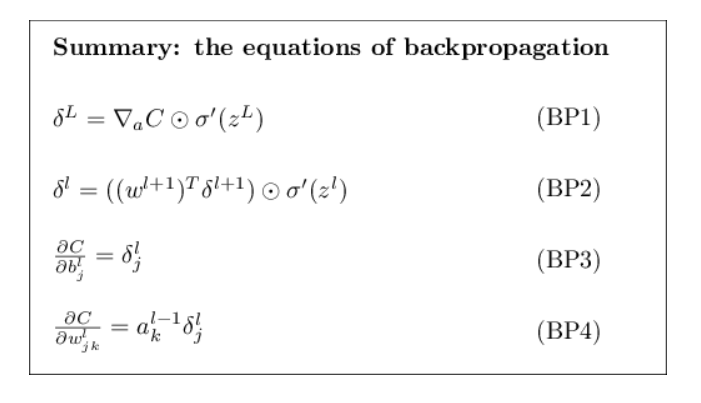

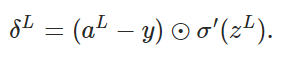


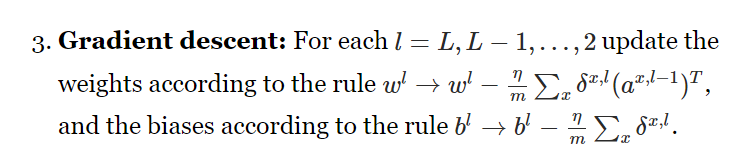

In [ ]:
# Calculate neuron activation for an input

def pre_activation(weights, inputs):
	#Weights will be m*n matrix, inputs will be n*1 matrix. where m is number of neurons in the current layer. 
	pre_activation = np.dot(weights, inputs)
	return pre_activation

def sigmoid_activation(pre_activation):
	## write code. implement sigmoid function
	out_sigmoid = 1.0 / (1.0 + np.exp(-pre_activation))
	return out_sigmoid
 
# Calculate the derivative of a neuron output
def sigmoid_derivative(output):
	## write code. implement sigmoid function
	out_sigmoid_deriv = output*(1-output)
	return out_sigmoid_deriv

# Forward Propagation:
def forward_propagation(network, row):
	inputs = np.array([row[:-1]]).T

	for layer in network.keys():
		pre_act = network[layer][:, :-1]@inputs
		act = sigmoid_activation(pre_act)
		network[layer][:, -1:] = act
		inputs = act

	return inputs

# Backpropagation:
def backward_propagate_error(network, ground_truth):
	error = {}
	for layer in reversed(network.keys()):
		if layer == f'layer_{len(network)}':
			# print('Before that', np.array(network[layer][:, -1:]), np.array([ground_truth]).T)
			# print('that', np.array(network[layer][:, -1:]) - np.array([ground_truth]).T)
			error[layer] = (np.array(network[layer][:, -1:]) - np.array([ground_truth]).T)*sigmoid_derivative(network[layer][:, -1:])		#Task here is to figure out, what should be the formatting of activation? Knowing my output vector is 1*1 and ground_truth is given to be 2*1.
		else:
			error[layer] = (network[f'layer_{int(layer[6])+1}'][:, :-1].T)@error[f'layer_{int(layer[6])+1}']

	return error


# Stochastic GD for weight updation:
def update_weights(network, row, l_rate, error):
	for i in range(len(network)+1):
		inputs = np.array([row[:-1]])
		if i == 0:
			activation = inputs.copy().T
		else:
			activation = network[layer][:, -1:]
		if i<len(network):
			# print('This',error[f'layer_{i+1}'].shape, activation.T.shape)
			try:
				network[f'layer_{i+1}'][:, :-1] = network[f'layer_{i+1}'][:, :-1] - l_rate*error[f'layer_{i+1}']@(activation.T)
				# print('dis happning')
			except:
				pass 	 
		
# Train a network for a fixed number of epochs
def train(network, train, l_rate, n_epoch, n_outputs):
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			outputs = forward_propagation(network, row)
			expected = [0 for i in range(n_outputs)]
			expected[row[-1]] = 1				#This looks like one hot code. 
			sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
			error_dict = backward_propagate_error(network, expected)
			update_weights(network, row, l_rate, error_dict)
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))      
	

In [ ]:
#Define network architecture...
# I will combine network weights and activation values in single numpy array for each array!
#NOTE that network architecture is such a way that, activation values of the next layer is the last column of the weight matrix of previous layer. 

#So I will need to manipulate last column of 'network' each iteration. 


def network_architecture(number_of_layers, numer_of_neurons_in_each_layer):
  """
  This function will define the network. and initialize weights for each of the layers. 
  Output: It will return a list of numpy arrays. 

  example inputs:
  for a 2-->500-->50-->1 network inputs to this function would look like below.
  number of layers = 4
  number of neurons in each layer = 2, 500, 50, 1
  """

  if len(numer_of_neurons_in_each_layer) != number_of_layers:
    print("Number of hidden layer must be equal to the length of 'numer_of_neurons_in_each_layer' ")
    #NOTE: Provide some form of error mechanism here. 
    return None
  
  network_layout = {}
  
  for i in range(number_of_layers-1):

    # Weight matrix will have the following dimensions
    # Number of columns = Number of neurons in current layer.
    # Number of rows = Number of neurons in next layer.

    x = numer_of_neurons_in_each_layer[i]
    y = numer_of_neurons_in_each_layer[i+1]
    weight_matrix = np.random.rand(y,x+1)*2 - 1

    network_layout[f'layer_{i+1}'] = weight_matrix

  return network_layout

"""
#The network will have 4 layers, 

1. Input Layer: 2 neurons
2. Hidden Layer 1: 500 neurons
3. Hidden Layer 2: 50 neurons
4. Output Layer: 2 neurons. 
"""

network = network_architecture(4, [2, 500, 50, 2])

network['layer_1'].shape, network['layer_2'].shape, network['layer_3'].shape

((500, 3), (50, 501), (2, 51))

In [ ]:
n_inputs = len(sample_dataset[0]) - 1
n_outputs = len(set([sample[-1] for sample in sample_dataset]))
train(network, sample_dataset, l_rate=0.5, n_epoch=100, n_outputs=n_outputs)
for layer in network:
	print(layer)

>epoch=0, lrate=0.500, error=8.055
>epoch=1, lrate=0.500, error=9.983
>epoch=2, lrate=0.500, error=9.969
>epoch=3, lrate=0.500, error=9.905
>epoch=4, lrate=0.500, error=8.046
>epoch=5, lrate=0.500, error=6.125
>epoch=6, lrate=0.500, error=6.175
>epoch=7, lrate=0.500, error=5.019
>epoch=8, lrate=0.500, error=5.016
>epoch=9, lrate=0.500, error=5.011
>epoch=10, lrate=0.500, error=5.005
>epoch=11, lrate=0.500, error=4.996
>epoch=12, lrate=0.500, error=4.983
>epoch=13, lrate=0.500, error=4.948
>epoch=14, lrate=0.500, error=5.464
>epoch=15, lrate=0.500, error=0.001
>epoch=16, lrate=0.500, error=0.000
>epoch=17, lrate=0.500, error=0.000
>epoch=18, lrate=0.500, error=0.000
>epoch=19, lrate=0.500, error=0.000
>epoch=20, lrate=0.500, error=0.000
>epoch=21, lrate=0.500, error=0.000
>epoch=22, lrate=0.500, error=0.000
>epoch=23, lrate=0.500, error=0.000
>epoch=24, lrate=0.500, error=0.000
>epoch=25, lrate=0.500, error=0.000
>epoch=26, lrate=0.500, error=0.000
>epoch=27, lrate=0.500, error=0.000
>e

In [ ]:
for layer in reversed(network.keys()):
  print(layer)
  # print(f'layer_{int(layer[6])+1}')
  print(network[layer][:, :-1].shape)

network.keys()

# network['layer_3'][:, -1:]

np.array([[0.00396039,0.00059117]])- np.array([0, 1])

layer_3
(2, 50)
layer_2
(50, 500)
layer_1
(500, 2)


array([[ 0.00396039, -0.99940883]])